# Insurance Price Prediction

## health insurance price prediction using ML 

#### Import required library , packages and datasets

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset 


In [2]:
df = pd.read_csv('./new_insurance_raw_data.csv')
df.head()

,customerID,age,gender,bmi,bloodpressure,diabetics,children,smoker,region,premium
0,1,19.0,female,27.9,91.0,Yes,0.0,yes,southwest,16884.92
1,2,18.0,male,33.8,92.0,No,1.0,no,southeast,1725.55
2,3,28.0,male,33.0,93.0,Yes,3.0,no,southeast,4449.46
3,4,33.0,male,22.7,80.0,No,0.0,NaN,northwest,21984.47
4,5,32.0,male,28.9,81.0,No,0.0,no,northwest,3866.86


In [3]:
df.describe()


,customerID,age,bmi,bloodpressure,children,premium
count,63038.000000,63023.000000,62872.000000,62812.000000,62684.000000,63038.000000
mean,31519.500000,40.968329,29.603229,94.402614,2.046519,12792.199104
std,18197.647472,13.827395,6.801630,11.057175,1.556217,12010.585115
min,1.000000,2.000000,-3.100000,73.000000,0.000000,971.870000
25%,15760.250000,29.000000,25.300000,87.000000,1.000000,4437.130000
50%,31519.500000,40.000000,29.600000,93.000000,2.000000,8453.820000
75%,47278.750000,52.000000,33.900000,100.000000,3.000000,16550.890000
max,63038.000000,72.000000,53.900000,149.000000,7.000000,64120.430000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63038 entries, 0 to 63037
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerID     63038 non-null  int64  
 1   age            63023 non-null  float64
 2   gender         62441 non-null  object 
 3   bmi            62872 non-null  float64
 4   bloodpressure  62812 non-null  float64
 5   diabetics      62823 non-null  object 
 6   children       62684 non-null  float64
 7   smoker         62522 non-null  object 
 8   region         62717 non-null  object 
 9   premium        63038 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 4.8+ MB


#### This dataset contains 63038 data points with 9 independent features and 1 target feature(premium).

### EDA (Exploratory Data Analysis

#####   EDA is an approach to analyzing the data using visual techniques.
#####   It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
#####   While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.



Handle null values , visualize data and take necessary action based on correlation

In [5]:
df.isnull().sum()

customerID         0
age               15
gender           597
bmi              166
bloodpressure    226
diabetics        215
children         354
smoker           516
region           321
premium            0
dtype: int64

#### check Categorical value count of features

In [6]:
df['children'].value_counts()

children
2.0    19117
0.0    13859
3.0    10868
1.0     8024
4.0     6025
5.0     3837
6.0      541
7.0      413
Name: count, dtype: int64

In [7]:
df['gender'].value_counts()

gender
male      31724
female    30717
Name: count, dtype: int64

In [8]:
##### customerID represents the no of premium index , so It has no relation with dataset so , we can discard it 

In [9]:
df.drop(['customerID'] , axis = 1 , inplace = True )

In [10]:
df['age'] # as in age column some missing data is there and some of the data is malacious

0        19.0
1        18.0
2        28.0
3        33.0
4        32.0
         ... 
63033    37.0
63034    50.0
63035    50.0
63036    38.0
63037    24.0
Name: age, Length: 63038, dtype: float64

#### - As per the statastical information Dataset contain null values

#### - Must handle all Null values otherwise , it could produce biased result.

##### - We can handle those null values either by removing complete records or by replacing them with columns mean or mode values as per columns category.

In [11]:
df.isnull().sum()

age               15
gender           597
bmi              166
bloodpressure    226
diabetics        215
children         354
smoker           516
region           321
premium            0
dtype: int64

##### - age and smoker is one of the most important and sensitive feature for premium prediction so need to handle it carefully , remove records those are with null values .

In [12]:
df = df.dropna(subset = ['age' , 'smoker'])

##### by looking at dataset we analyze that region , diabetics and gender columns are with high premium charges so it may change predication result by filling those null values so , we mus drop those records .

In [13]:
df = df.dropna(subset = ['gender' , 'region' , 'diabetics'])
df.isna().sum()

age                0
gender             0
bmi              154
bloodpressure    217
diabetics          0
children         315
smoker             0
region             0
premium            0
dtype: int64

##### the null values we can fill with the column mean for bmi , bloodpressure and diabetics table because these columns are with continuous values.

In [14]:
df['bloodpressure'].fillna(int(df['bloodpressure'].mean()), inplace=True)

In [15]:
df['bmi'].fillna(int(df['bmi'].mean()), inplace=True)

##### - The children column null values can be filled with mode because it is like categrical column .instead of removing records containing null values we can fill missing values with its column mode value .

In [16]:
df['children'].fillna(df['children'].mode()[0] , inplace= True)

In [17]:
df.isna().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetics        0
children         0
smoker           0
region           0
premium          0
dtype: int64

#### Here we deal with all missing values in our dataset. Now , there is no missing values in the datset.

#### In the dataset in some columns some duplicate , anomalies and wrong data has there we need to tackle that records and convert dataset into standart format for model building . 

##### The only thing we can need to check is for duplicates and presence of outliers.


In [18]:
df.drop_duplicates(inplace=True)

##### Check the age , bmi , bloodpressure is in standard range or not if not handle them , either by removing record or converting them into a standard scale as per the problm requirement .

In [19]:
row , col = df.shape

In [20]:
row , col

(46157, 9)

##### Remove those records who are not satisfying standard age condition (18 - 60 ) 

In [21]:
df = df[(df['age'] >= 18) & (df['age'] <= 60)]


##### Remove those records who are not satisfying standard bmi condition (15 - 50) 

In [22]:
df = df[(df['bmi'] >= 15) & (df['bmi'] <= 50)]

##### Remove those records who are not satisfying standard bloodpressure condition (80 - 120) 

In [23]:
df = df[(df['bloodpressure'] >= 80) & (df['bloodpressure'] <= 120)] 

In [24]:
row , col = df.shape
row , col

(35340, 9)

#### - Region and age both are categorical important columns need to be handled carefully . These are Nominal columns

In [25]:
df['region'].value_counts()

region
southeast    9688
southwest    8566
northeast    8552
northwest    8534
Name: count, dtype: int64

In [26]:
df['gender'].value_counts()

gender
male      17928
female    17412
Name: count, dtype: int64

In [27]:
#### plot the age vs premium graph fro just visualization

Text(0.5, 1.0, 'Age vs Premium ')

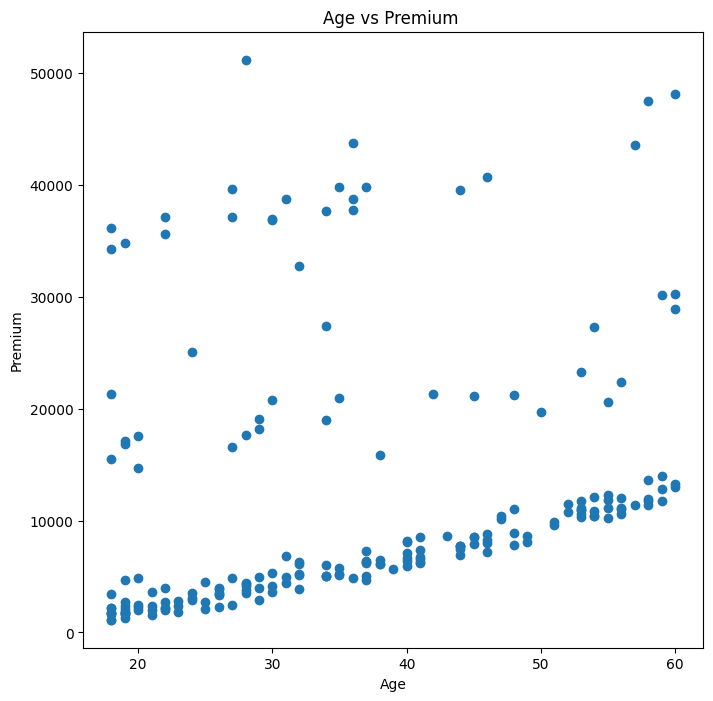

In [28]:
plt.figure(figsize=(8 , 8))
plt.scatter(df['age'].head(200), df['premium'].head(200) )
plt.xlabel('Age')
plt.ylabel('Premium')
plt.title('Age vs Premium ')

<Axes: xlabel='premium', ylabel='Count'>

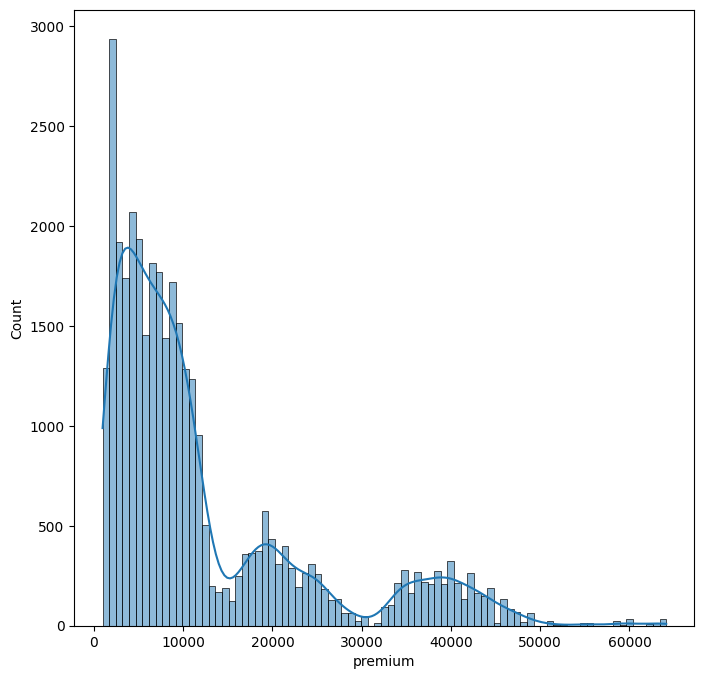

In [29]:
plt.figure(figsize=(8,8))
sns.histplot(x= 'premium',data = df,kde = True) 

#### from above graph we can observed that majority of people bought premium upto 10000 and there are very less people who bought premium above 50000

#### Check different distribution of columns 

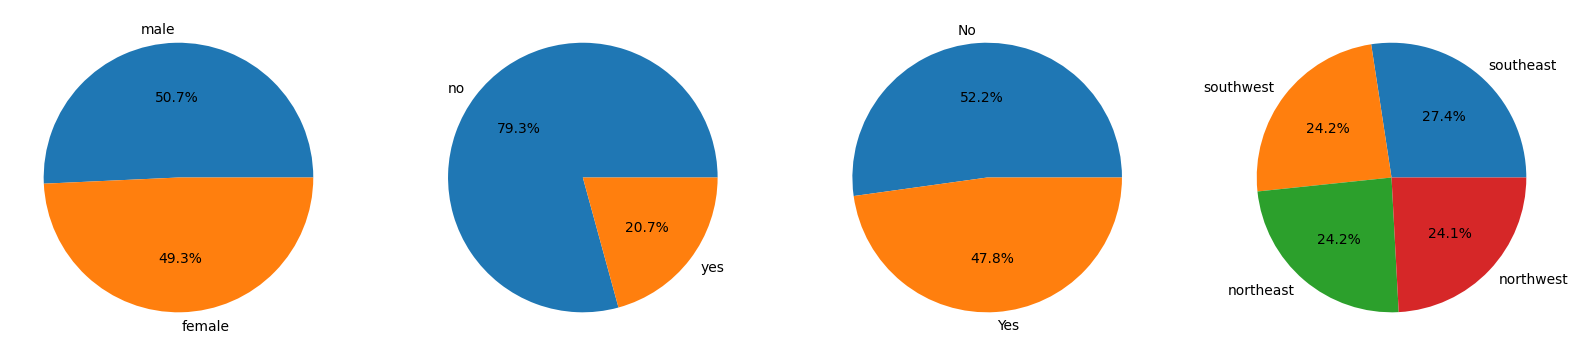

In [30]:

import matplotlib.pyplot as plt

features = ['gender', 'smoker', 'diabetics', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')

plt.show()


#### By looking at this chart we can conclude that our dataset is unbiased so there is no need for data augmentation .

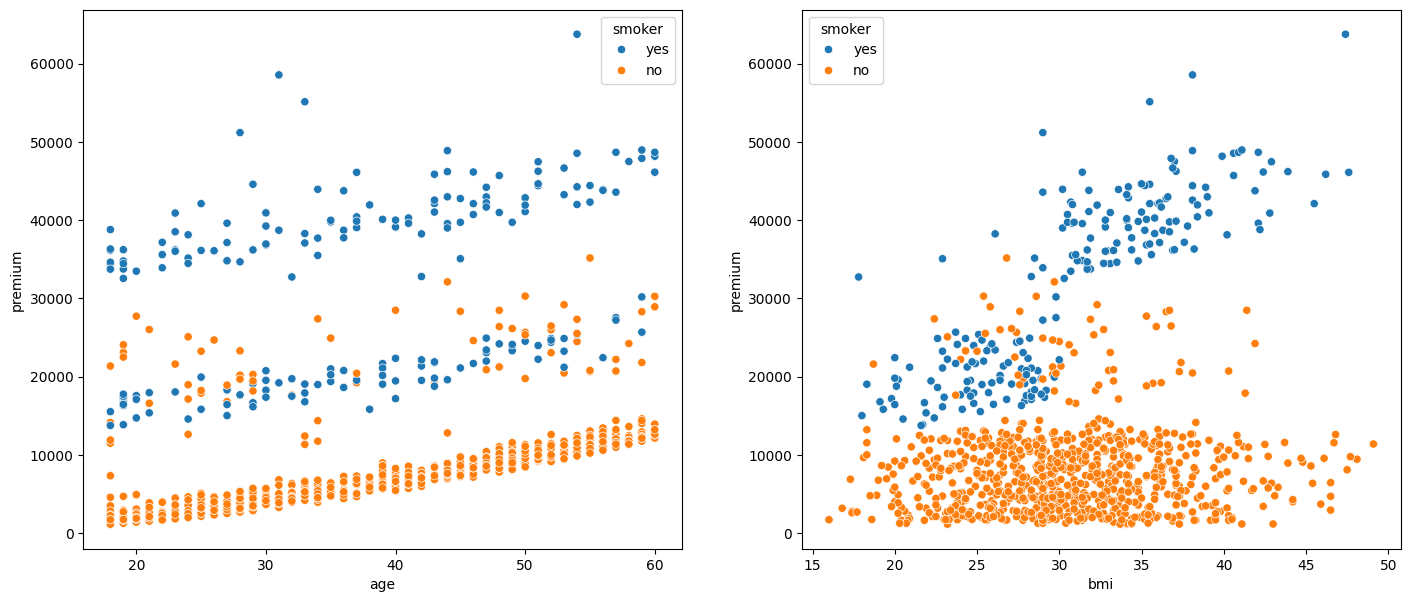

In [31]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df.head(1000), x=col,
				y='premium',
				hue='smoker')
plt.show()



A clear distinction can be observed here between the charges that smokers have to pay more premium . Also here as well we can observe that as the age of a person increases premium price also increases.



## DATA PREPROCESSING

Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

IN preprocesing we have problem of label encoding , checking feature standard , standard scaling , find correlation and many more operaion required for data cleaning

#### To crate a model from a dataset need to conver all dataset into numeric values .

#### Label encoing for the categorical features

LabelEncoding is a  encoding technique which  is a suitable technique for converting binary categorical data (e.g., Yes/No) and nominal categorical data (e.g., 'gender' , region) into a format that is suitable for machine learning models.

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['diabetics'] = label_encoder.fit_transform(df['diabetics'])

df.head(10)



,age,gender,bmi,bloodpressure,diabetics,children,smoker,region,premium
0,19.0,0,27.9,91.0,1,0.0,1,southwest,16884.92
1,18.0,1,33.8,92.0,0,1.0,0,southeast,1725.55
2,28.0,1,33.0,93.0,1,3.0,0,southeast,4449.46
4,32.0,1,28.9,81.0,0,0.0,0,northwest,3866.86
6,46.0,0,33.4,86.0,1,1.0,0,southeast,8240.59
7,37.0,0,27.7,100.0,0,2.0,0,northwest,7281.51
8,37.0,1,29.8,86.0,0,2.0,0,northeast,6406.41
9,60.0,0,25.8,97.0,0,0.0,0,northwest,28923.14
10,25.0,1,26.2,88.0,1,0.0,0,northeast,2721.32
12,23.0,1,34.4,81.0,0,0.0,0,southwest,1826.84


#### For region column we need to do one hot encoding because it is nominal field . 

In [33]:
df = pd.get_dummies(df , columns = ['region'] , prefix = 'r').astype(int)

In [34]:
df.head(10)

,age,gender,bmi,bloodpressure,diabetics,children,smoker,premium,r_northeast,r_northwest,r_southeast,r_southwest
0,19,0,27,91,1,0,1,16884,0,0,0,1
1,18,1,33,92,0,1,0,1725,0,0,1,0
2,28,1,33,93,1,3,0,4449,0,0,1,0
4,32,1,28,81,0,0,0,3866,0,1,0,0
6,46,0,33,86,1,1,0,8240,0,0,1,0
7,37,0,27,100,0,2,0,7281,0,1,0,0
8,37,1,29,86,0,2,0,6406,1,0,0,0
9,60,0,25,97,0,0,0,28923,0,1,0,0
10,25,1,26,88,1,0,0,2721,1,0,0,0
12,23,1,34,81,0,0,0,1826,0,0,0,1


##### Complete dataset has converted into numeric

#### If there exists any outliers we should handle here for all continuous numeric column

<Axes: ylabel='age'>

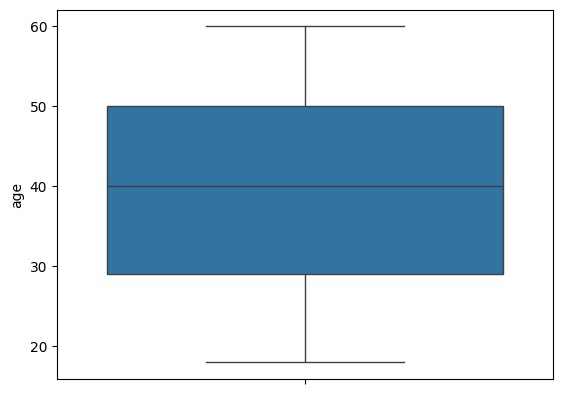

In [35]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

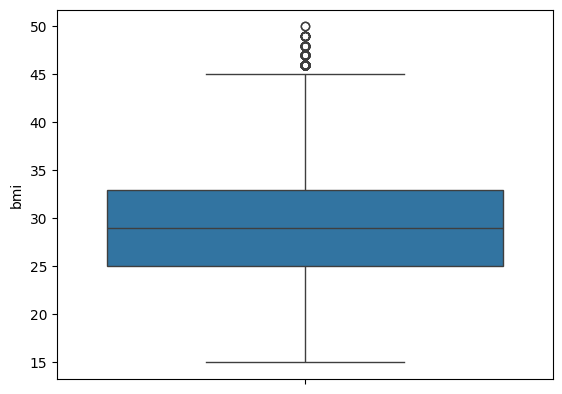

In [36]:
sns.boxplot(df['bmi'])


Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

<Axes: ylabel='bmi'>

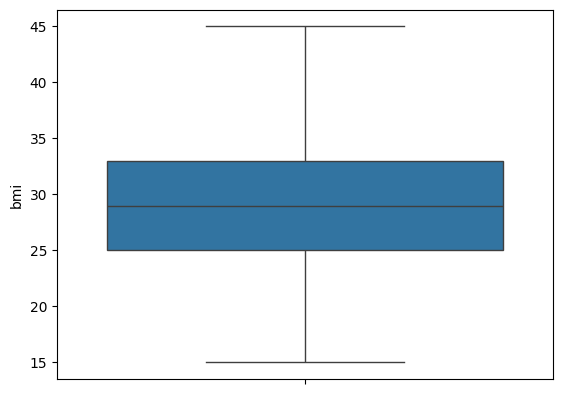

In [37]:
# Assuming you have a DataFrame named 'df' with a 'bmi' column

# Calculate the 25th and 75th percentiles (Q1 and Q3)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for Winsorization
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorization to the 'bmi' column
df['bmi'] = df['bmi'].clip(lower_bound, upper_bound)

# Plot a boxplot to visualize the capped 'bmi' values
sns.boxplot(df['bmi'])

This code will handle outliers in the 'bmi' column by capping extreme values, making them fall within the defined range while preserving the rest of the data distribution. You can adjust the multiplier (e.g., 1.5) in the IQR-based bounds to control the extent of Winsorization.

##### Data Wrangling

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [38]:
df['bmi'].skew()


0.22374384849426723

In [39]:
df['gender'].skew()


-0.02920639031135671

In [40]:
df['age'].skew()

0.024888117780413534

Data in both the age,gender , region and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35340 entries, 0 to 48039
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            35340 non-null  int64
 1   gender         35340 non-null  int64
 2   bmi            35340 non-null  int64
 3   bloodpressure  35340 non-null  int64
 4   diabetics      35340 non-null  int64
 5   children       35340 non-null  int64
 6   smoker         35340 non-null  int64
 7   premium        35340 non-null  int64
 8   r_northeast    35340 non-null  int64
 9   r_northwest    35340 non-null  int64
 10  r_southeast    35340 non-null  int64
 11  r_southwest    35340 non-null  int64
dtypes: int64(12)
memory usage: 3.5 MB


#### As all data is in numeric format so find correlation between tables and premium

In [42]:
df.corr()['premium']


age              0.238430
gender           0.067008
bmi              0.187641
bloodpressure   -0.000035
diabetics       -0.003212
children         0.067675
smoker           0.800357
premium          1.000000
r_northeast      0.019709
r_northwest     -0.040999
r_southeast      0.067583
r_southwest     -0.049102
Name: premium, dtype: float64

##### We can plot heatmap for finding correlation between columns

<Axes: >

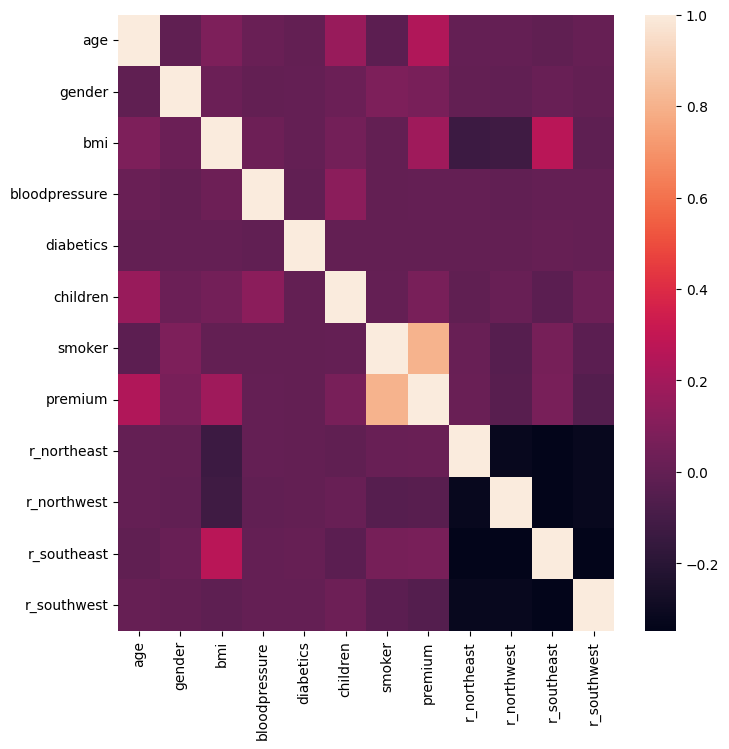

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

##### By looking at graph we are sure that there is no multicollinarity exists in the dataset

##### FOR VISUALIZATION OF data data need to be converted into 2d so for that PCA should be done 

### Reduce all field except premium and custmerID to only one dimension using PCA to find relation

In [44]:
# from sklearn.decomposition import PCA
# df = df.sample(frac = 1)
# # create an object of PCA
# pca = PCA(n_components=1)

# # fit the data
# pca.fit(df)
# pca
# # transform the data
# new_component = pca.transform(df)
# A = pd.DataFrame(new_component)



In [45]:
# plt.figure(figsize=(10 , 10))
# plt.scatter(A.head(20000), df['premium'].head(20000))


##### By observing the we can conclude that our model is with positive relation.

#### data is completely cleaned and it is ready for model building so for that 

In [46]:
x , y = df.shape
x , y 

(35340, 12)

In [47]:
X=df.drop({'premium' },axis=1)
Y=df[['premium']]

In [48]:
from sklearn.model_selection import train_test_split

# split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75)

In [49]:
def build_lin_reg():
    from sklearn.linear_model import LinearRegression

    # create a model
    model = LinearRegression()  
    # train the model using train data set
    model.fit(x_train, y_train)
    return model
        

In [50]:
def build_rf_reg():
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(random_state=3)
    model.fit(x_train, y_train)
    return model
    
    

In [51]:
def build_svr_reg():
    from sklearn.svm import SVR
    model = SVR()
    model.fit(x_train, y_train)
    return model
    

In [52]:
def build_xg_reg():
    from xgboost import XGBRegressor
    model=XGBRegressor(n_estimators=19)
    model.fit(x_train,y_train)
    return model

In [53]:
def build_grb_reg():
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor(n_estimators=5,learning_rate=0.4)
    model.fit(x_train , y_train)
    return model
    

In [54]:
lin_reg = build_lin_reg()


In [55]:
rf_reg = build_rf_reg()

In [56]:
# svr_reg = build_svr_reg()

In [57]:
xg_reg = build_xg_reg()


In [58]:
grb_reg = build_grb_reg()

In [59]:
def evaluate_model(model):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    y_true = y_test
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"mean absolute error: {mae:.2f}")
    print(f"mean squared error: {mse:.2f}")
    print(f"root mean squarred error: {rmse:.2f}")
    print(f"r2 score = {r2:.2f} %")

In [60]:
evaluate_model(lin_reg)

mean absolute error: 4232.90
mean squared error: 36857732.92
root mean squarred error: 6071.06
r2 score = 0.74 %


In [61]:
evaluate_model(rf_reg)

mean absolute error: 1778.22
mean squared error: 12241832.44
root mean squarred error: 3498.83
r2 score = 0.91 %


In [62]:
# evaluate_model(svr_reg)

In [63]:
evaluate_model(xg_reg)

mean absolute error: 2358.58
mean squared error: 17226274.55
root mean squarred error: 4150.45
r2 score = 0.88 %


In [64]:
evaluate_model(grb_reg)

mean absolute error: 2902.20
mean squared error: 22250436.15
root mean squarred error: 4717.04
r2 score = 0.84 %


In [71]:
y_pred = xg_reg.predict([[46 ,	0 ,	3 , 3	 , 86 ,	1 ,	1 ,	0	,	0 ,	0 ,	1 ,	 0]])
y_pred[0]

ValueError: Feature shape mismatch, expected: 11, got 12

In [66]:
import pickle

In [67]:
def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

In [68]:
save_model(xg_reg,'Insurance_premium_prediction_model.pkl')

In [69]:
df.head()

,age,gender,bmi,bloodpressure,diabetics,children,smoker,premium,r_northeast,r_northwest,r_southeast,r_southwest
0,19,0,27,91,1,0,1,16884,0,0,0,1
1,18,1,33,92,0,1,0,1725,0,0,1,0
2,28,1,33,93,1,3,0,4449,0,0,1,0
4,32,1,28,81,0,0,0,3866,0,1,0,0
6,46,0,33,86,1,1,0,8240,0,0,1,0
